1. look at variance on ST08Q01, ST09Q01, ST115Q01
2. add EDA
3. apply a regression
4. make something a binomial variable and then apply classification
5. make a separate model for each country then compair by country


Question spreadsheet ID:

* Q8 = ST08Q01 - In the last two full weeks of school, how many times did you arrive late for school?
* Q9 = ST09Q01 - In the last two full weeks of school, how many times did you <skip> a whole school day?
* Q10 = ST115Q01 - In the last two full weeks of school, how many times did you <skip> some classes?
* Q29 - How many hours do you typically spend per week attending <out-of-school-time lessons> in the following subjects?
    * ST55Q01 - "Out of school lessons - <test lang>"
    * ST55Q02 - "Out of school lessons - <maths>"
    * ST55Q03 - "Out of school lessons - <science>"
    * ST55Q04 - "Out of school lessons - other"
* Q30 - Thinking about all school subjects: on average, how many hours do you spend each week on the following?
    * ST57Q01 - "Out-of-School Study Time - Homework"
    * ST57Q02 - "Out-of-School Study Time - Guided Homework"
    * ST57Q03 - "Out-of-School Study Time - Personal Tutor"
    * ST57Q04 - "Out-of-School Study Time - Commercial Company"
    * ST57Q05 - "Out-of-School Study Time - With Parent"
    * ST57Q06 - "Out-of-School Study Time - Computer"
* Q41 - Thinking about studying mathematics: to what extent do you agree with the following statements?
    * ST42Q01 - "Maths Anxiety - Worry That It Will Be Difficult"
    * ST42Q02 - "Maths Self-Concept - Not Good at Maths "
    * ST42Q03 - "Maths Anxiety - Get Very Tense"
    * ST42Q04 - "Maths Self-Concept - Get Good <Grades>"
    * ST42Q05 - "Maths Anxiety - Get Very Nervous"
    * ST42Q06 - "Maths Self-Concept - Learn Quickly"
    * ST42Q07 - "Maths Self-Concept - One of Best Subjects"
    * ST42Q08 - "Maths Anxiety - Feel Helpless"
    * ST42Q09 - "Maths Self-Concept - Understand Difficult Work"
    * ST42Q10 - "Maths Anxiety - Worry About Getting Poor <Grades>"

Parent question spreadsheet ID:

* PA13Q01 - Discuss how well my child is doing at school.
* PA13Q02 - Eat <the main meal> with my child around a table.
* PA13Q03 - Spend time just talking to my child.
* PA13Q04 - Help my child with his/her mathematics homework.
* PA13Q05 - Discuss how my child is performing in mathematics class.
* PA13Q06 - Obtain mathematics materials (e.g., applications, software, study guides etc) for my child.
* PA13Q07 - Discuss with my child how mathematics can be applied in everyday life.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV


# Loading the spreadsheets for Q8, Q9, Q10 from student questionaires.

In [72]:
# ST08Q01

ST08Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST08Q01.xls', 
                        skiprows = 1)

# ST09Q01

ST09Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST09Q01.xls', 
                        skiprows = 1)

# ST115Q01

ST115Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST115Q01.xls',
                        skiprows = 1)

## Cleaning headers and values

In [73]:
for x in ST08Q01.columns:
    ST08Q01 = ST08Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for x in ST08Q01:
        ST08Q01 = ST08Q01[ST08Q01.no_of_valid_resp != 'Valid']     
        

# ST08Q01 remove () from column values

ST08Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST08Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(lambda value: 
                                                                                value.replace('(', '').replace(')',''))
ST08Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST08Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(float)

# Drop 2 empty rows

ST08Q01.dropna()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missing,resp_missing_se
1,Australia,250711,1.17439,247767,64.2132,0.56,25.3104,0.52,6.5746,0.26,3.52282,0.19,0.378915,0.05
2,Austria,82225,0.366871,81923.4,78.9024,0.94,15.5747,0.73,3.21683,0.32,2.02188,0.26,0.284139,0.09
3,Belgium,117889,0.87545,116857,72.489,0.67,20.7482,0.56,3.70374,0.32,2.83237,0.22,0.226746,0.06
4,Canada,347987,1.38883,343154,56.2731,0.66,28.2667,0.51,9.09058,0.37,5.33361,0.30,1.03601,0.12
5,Chile,229159,1.08238,226678,46.8541,1.05,34.8501,0.71,10.4788,0.53,7.52486,0.54,0.292178,0.08
6,Czech Republic,82250.1,0.2604,82035.9,72.8424,0.77,20.7,0.69,3.30074,0.30,2.97333,0.32,0.183538,0.08
7,Denmark,65642,0.954338,65015.5,61.2909,1.07,26.2328,0.75,7.48638,0.45,4.6167,0.40,0.373246,0.08
8,Estonia,11626.5,0.696724,11545.5,58.7174,0.94,29.0067,0.69,7.80537,0.45,4.20364,0.39,0.266947,0.09
9,Finland,60047.2,0.71813,59616,56.4498,0.94,30.5153,0.71,8.15168,0.47,3.96476,0.30,0.918488,0.11
10,France,699779,1.4585,689572,67.4614,0.93,24.2958,0.74,4.98251,0.38,2.83442,0.29,0.425922,0.09


In [74]:
for y in ST09Q01.columns:
    ST09Q01 = ST09Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for y in ST09Q01:
        ST09Q01 = ST09Q01[ST09Q01.no_of_valid_resp != 'Valid']     

# Change '(' and ')' to ''        

ST09Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
         'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST09Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
                                                                                    'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(lambda value: 
                                                                                      value.replace('(', '').replace(')',''))
ST09Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
         'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST09Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
                                                                                    'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(float)

# Drop empty rows

ST09Q01.dropna()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missing,resp_missing_se
1,Australia,250711,1.17439,247767,67.8926,0.60,25.5633,0.50,4.31396,0.23,1.78713,0.14,0.443006,0.06
2,Austria,82225,0.366871,81923.4,91.7129,0.52,7.11814,0.47,0.442751,0.12,0.45091,0.14,0.275297,0.10
3,Belgium,117889,0.87545,116857,94.2466,0.36,4.20449,0.28,0.720487,0.13,0.621118,0.10,0.207267,0.06
4,Canada,347987,1.38883,343154,76.9757,0.55,18.6456,0.44,2.27875,0.16,0.911927,0.12,1.18796,0.11
5,Chile,229159,1.08238,226678,91.8944,0.54,6.46296,0.46,0.756537,0.13,0.476812,0.10,0.409261,0.09
6,Czech Republic,82250.1,0.2604,82035.9,94.0666,0.47,4.11032,0.37,0.650067,0.14,1.08793,0.19,0.0851292,0.06
7,Denmark,65642,0.954338,65015.5,90.0294,0.55,7.79017,0.47,1.25204,0.19,0.553571,0.12,0.374809,0.07
8,Estonia,11626.5,0.696724,11545.5,84.5814,0.66,11.8749,0.60,1.99261,0.24,1.36077,0.18,0.190264,0.06
9,Finland,60047.2,0.71813,59616,88.6792,0.51,8.85528,0.41,0.804518,0.12,0.653461,0.21,1.00754,0.11
10,France,699779,1.4585,689572,89.8917,0.59,7.28331,0.46,1.12044,0.19,0.989016,0.16,0.715496,0.13


In [75]:
for z in ST115Q01.columns:
    ST115Q01 = ST115Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'None': 'resp_none_pct',
                                        'None.1': 'resp_none_se',
                                        'One or two times': 'resp_one_or_two_times_pct',
                                        'One or two times.1': 'resp_one_or_two_times_se',
                                        'Three or four times': 'resp_three_or_four_times_pct',
                                        'Three or four times.1': 'resp_three_or_four_times_se',
                                        'Five or more times': 'resp_five_or_more_times_pct',
                                        'Five or more times.1': 'resp_five_or_more__times_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })
    
# Delete the first row since it was inserted into the column headers
for z in ST115Q01:
        ST115Q01 = ST115Q01[ST115Q01.no_of_valid_resp != 'Valid']     

# ST115Q01 remove () from column values

ST115Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
         'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST115Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
                                                                                    'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(lambda value: 
                                                                                    value.replace('(', '').replace(')',''))
ST115Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
         'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']] = ST115Q01[['resp_three_or_four_times_se','resp_five_or_more__times_se', 
                                                                                    'resp_none_se', 'resp_one_or_two_times_se', 'resp_missing_se']].applymap(float)

# Drop empty rows

ST115Q01.dropna()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missing,resp_missing_se
1,Australia,250711,1.17439,247767,86.2561,0.42,10.409,0.35,1.84919,0.12,1.21965,0.12,0.26605,0.05
2,Austria,82225,0.366871,81923.4,86.8682,0.79,11.3885,0.70,1.02474,0.17,0.304828,0.09,0.413774,0.13
3,Belgium,117889,0.87545,116857,91.4791,0.38,6.76946,0.34,0.666217,0.12,0.688344,0.10,0.396874,0.09
4,Canada,347987,1.38883,343154,74.7296,0.46,18.9584,0.42,3.71778,0.19,1.75036,0.15,0.843775,0.09
5,Chile,229159,1.08238,226678,84.3082,0.77,13.7066,0.67,1.15514,0.16,0.510118,0.11,0.319924,0.08
6,Czech Republic,82250.1,0.2604,82035.9,92.4467,0.53,6.51125,0.49,0.509167,0.12,0.386216,0.09,0.146628,0.07
7,Denmark,65642,0.954338,65015.5,83.3514,0.84,13.6046,0.71,1.80136,0.25,0.874821,0.19,0.36779,0.08
8,Estonia,11626.5,0.696724,11545.5,69.9542,0.89,23.1817,0.74,4.45055,0.34,2.25273,0.25,0.160794,0.06
9,Finland,60047.2,0.71813,59616,83.6009,0.58,12.9298,0.49,1.71965,0.19,0.816292,0.19,0.933368,0.11
10,France,699779,1.4585,689572,82.8081,0.85,13.7104,0.70,1.98629,0.22,1.05319,0.16,0.442096,0.10


In [76]:
a = ['ST08Q01']
b = ['ST09Q01']
c = ['ST115Q01']

for val in ST08Q01.values[0]:
    a.append(val)
print a

for val in ST09Q01.values[0]:
    b.append(val)
print b

for val in ST115Q01.values[0]:
    c.append(val)
print c

['ST08Q01', u'Australia', 250711.29799289096, 1.1743870353594998, 247766.97701308093, 64.21324510508043, 0.56, 25.31042007097221, 0.52, 6.574601328855749, 0.26, 3.5228184202499286, 0.19, 0.37891507484168063, 0.05]
['ST09Q01', u'Australia', 250711.29799289105, 1.1743870353594994, 247766.97701308102, 67.89255934245988, 0.6, 25.56334344576197, 0.5, 4.313964438574437, 0.23, 1.7871270246151858, 0.14, 0.44300574858852615, 0.06]
['ST115Q01', u'Australia', 250711.29799289146, 1.1743870353594974, 247766.97701308143, 86.25607479764025, 0.42, 10.40904009770194, 0.35, 1.8491894133441324, 0.12, 1.2196452373368707, 0.12, 0.2660504539768163, 0.05]


In [77]:
Australia = {0:['q_id',                     
                      'cnt',                 
                      'total_number_of_resp', 
                      'pct_not_valid',     
                      'no_of_valid_resp', 
                      'resp_none_pct',   
                      'resp_none_se',   
                      'resp_one_or_two_times_pct',
                      'resp_one_or_two_times_se',
                      'resp_three_or_four_times_pct',
                      'resp_three_or_four_times_se',
                      'resp_five_or_more_times_pct',
                      'resp_five_or_more__times_se',
                      'pct__resp_missing'   
                      'resp_missing_se'],
             1: a,
             2: b,
             3: c}
Australia = pd.DataFrame.from_dict(Australia, orient='index', dtype=None)


Australia.columns = Australia.values[0]

for a in Australia:
        Australia = Australia[Australia.q_id != 'q_id']     
Australia

,q_id,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missingresp_missing_se,nan
1,ST08Q01,Australia,250711,1.17439,247767,64.2132,0.56,25.3104,0.52,6.5746,0.26,3.52282,0.19,0.378915,0.05
2,ST09Q01,Australia,250711,1.17439,247767,67.8926,0.6,25.5633,0.5,4.31396,0.23,1.78713,0.14,0.443006,0.06
3,ST115Q01,Australia,250711,1.17439,247767,86.2561,0.42,10.409,0.35,1.84919,0.12,1.21965,0.12,0.26605,0.05


In [78]:
Australia.corr()

,nan
NaN,1.0


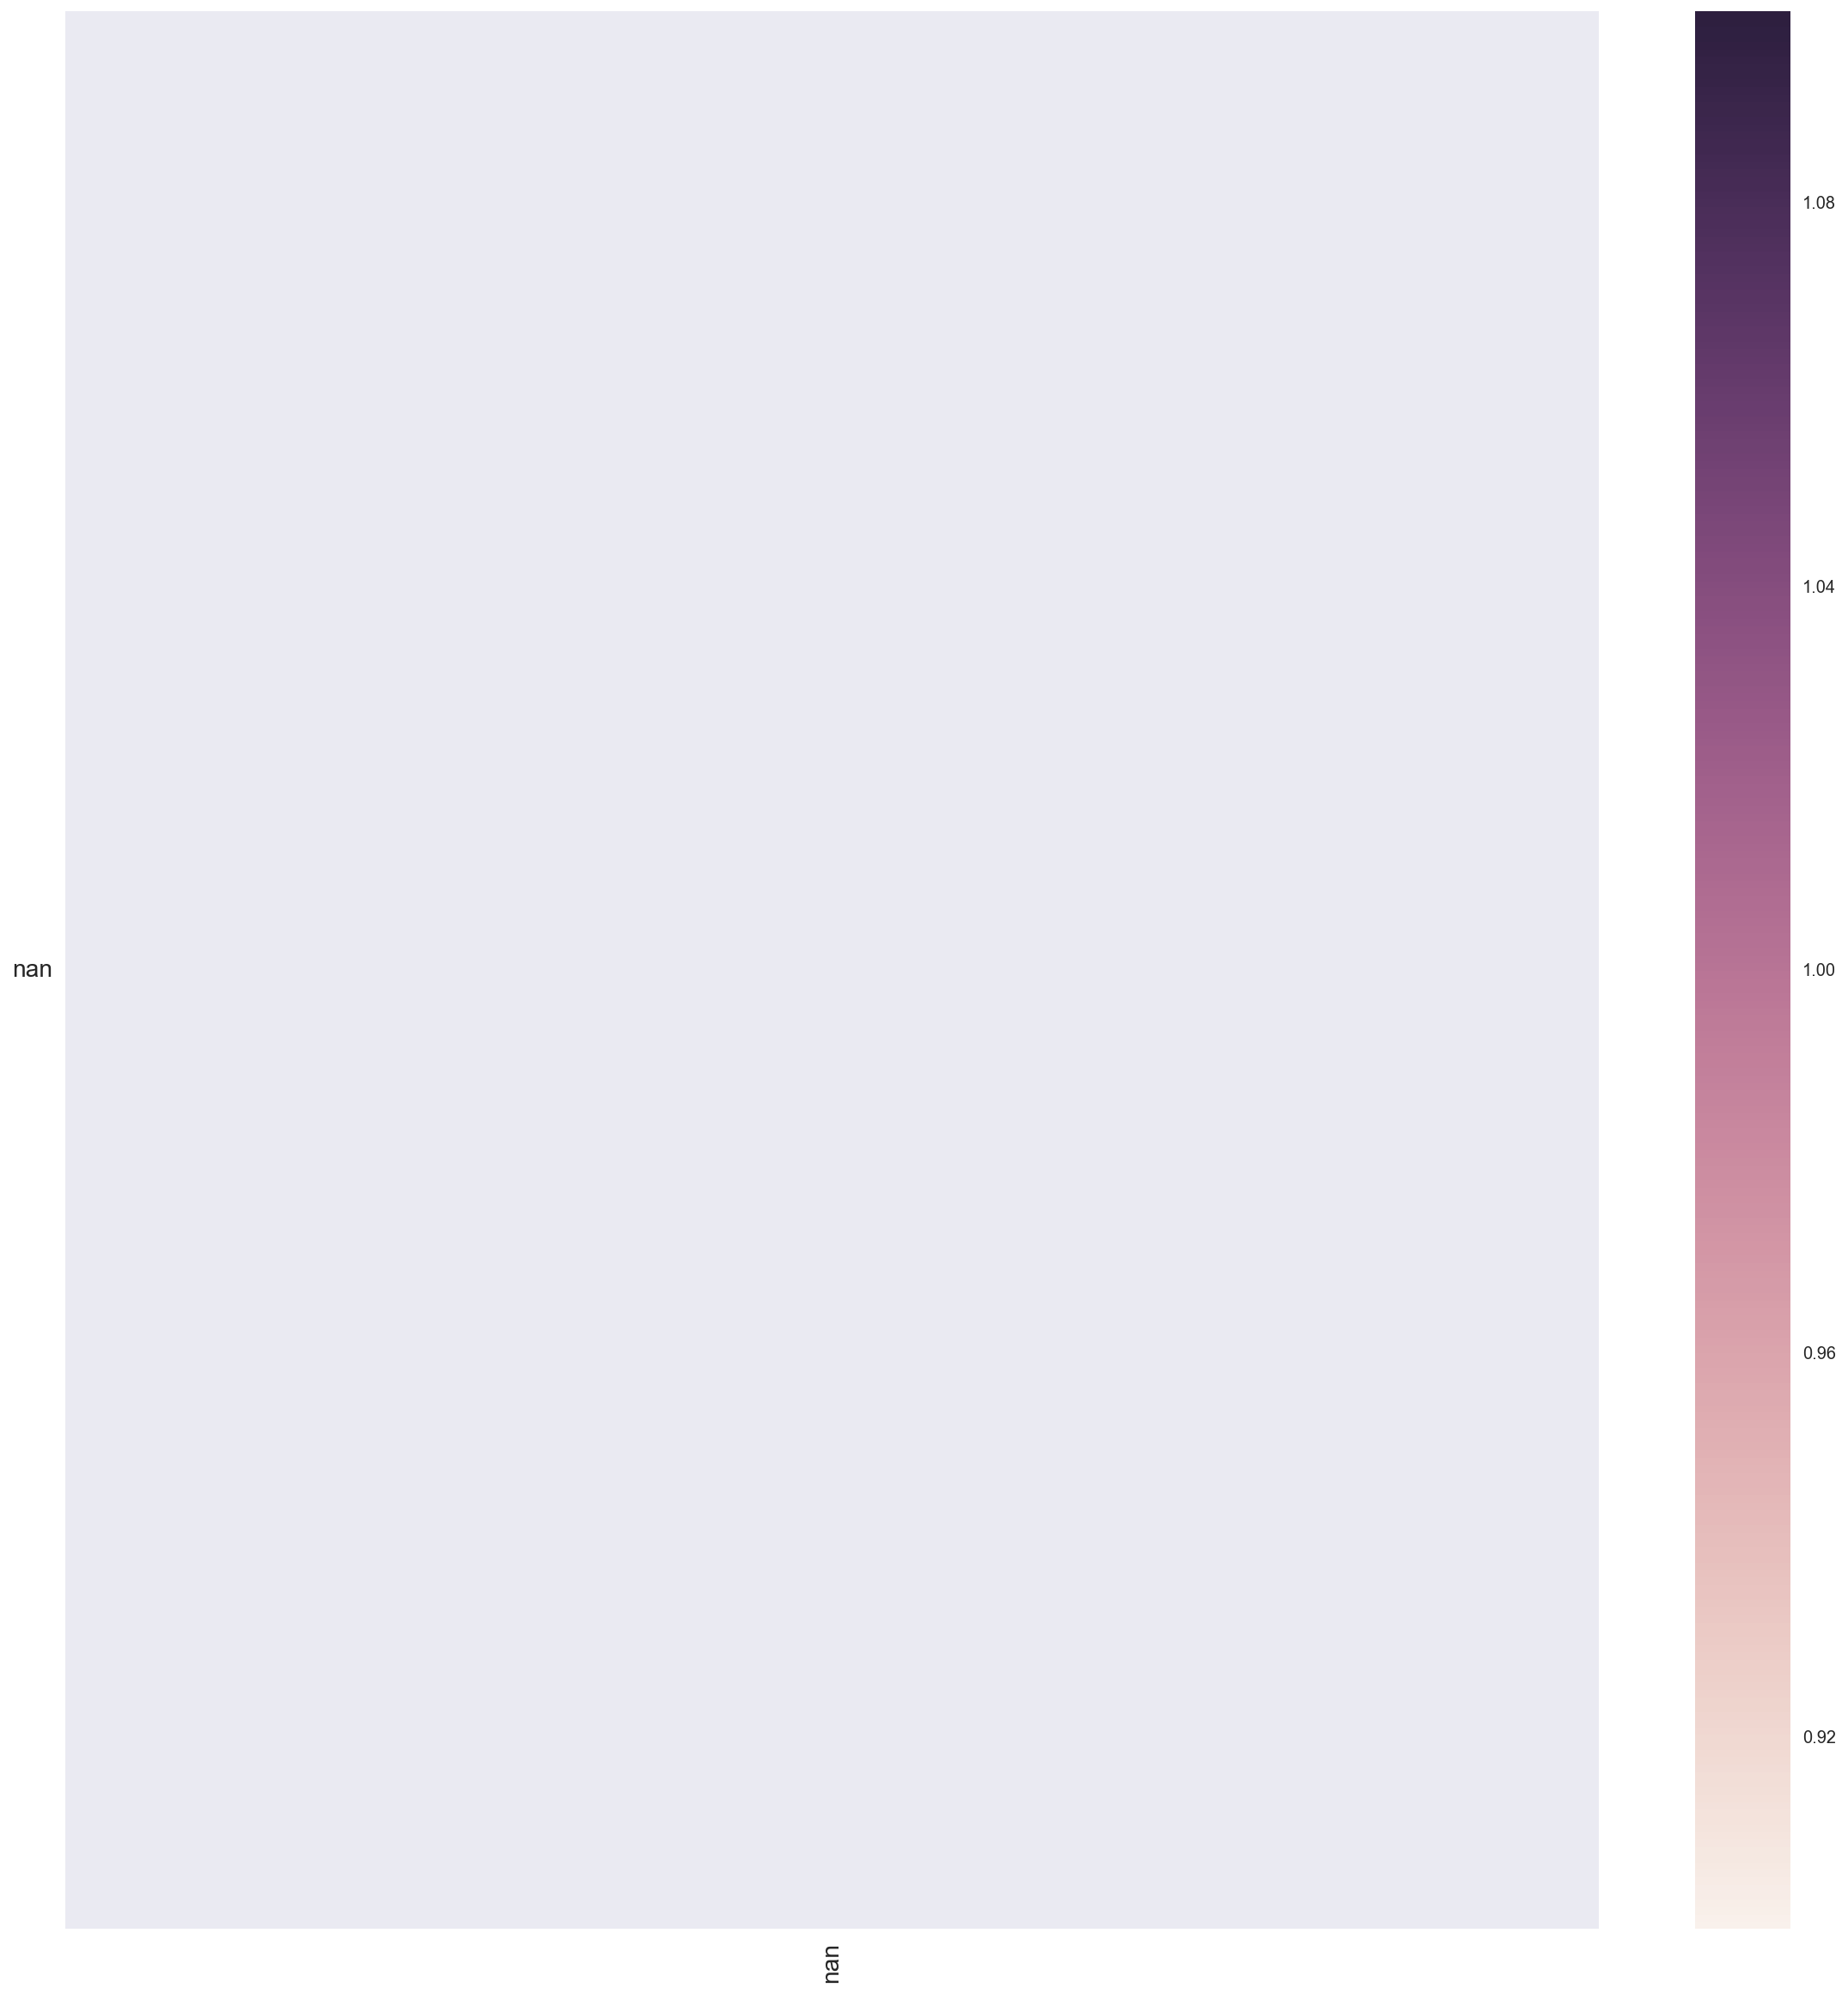

In [79]:
corrs = Australia.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [80]:
stu_late_skip = ST08Q01.append(ST09Q01).append(ST115Q01)

In [81]:
stu_late_skip.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missing,resp_missing_se
1,Australia,250711,1.17439,247767,64.2132,0.56,25.3104,0.52,6.5746,0.26,3.52282,0.19,0.378915,0.05
2,Austria,82225,0.366871,81923.4,78.9024,0.94,15.5747,0.73,3.21683,0.32,2.02188,0.26,0.284139,0.09
3,Belgium,117889,0.87545,116857,72.489,0.67,20.7482,0.56,3.70374,0.32,2.83237,0.22,0.226746,0.06
4,Canada,347987,1.38883,343154,56.2731,0.66,28.2667,0.51,9.09058,0.37,5.33361,0.30,1.03601,0.12
5,Chile,229159,1.08238,226678,46.8541,1.05,34.8501,0.71,10.4788,0.53,7.52486,0.54,0.292178,0.08


In [82]:
stu_late_skip = stu_late_skip.groupby('cnt')

In [83]:
stu_late_skip.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_none_pct,resp_none_se,resp_one_or_two_times_pct,resp_one_or_two_times_se,resp_three_or_four_times_pct,resp_three_or_four_times_se,resp_five_or_more_times_pct,resp_five_or_more__times_se,pct__resp_missing,resp_missing_se
1,Australia,250711,1.17439,247767,64.2132,0.56,25.3104,0.52,6.5746,0.26,3.52282,0.19,0.378915,0.05
2,Austria,82225,0.366871,81923.4,78.9024,0.94,15.5747,0.73,3.21683,0.32,2.02188,0.26,0.284139,0.09
3,Belgium,117889,0.87545,116857,72.489,0.67,20.7482,0.56,3.70374,0.32,2.83237,0.22,0.226746,0.06
4,Canada,347987,1.38883,343154,56.2731,0.66,28.2667,0.51,9.09058,0.37,5.33361,0.30,1.03601,0.12
5,Chile,229159,1.08238,226678,46.8541,1.05,34.8501,0.71,10.4788,0.53,7.52486,0.54,0.292178,0.08
6,Czech Republic,82250.1,0.2604,82035.9,72.8424,0.77,20.7,0.69,3.30074,0.30,2.97333,0.32,0.183538,0.08
7,Denmark,65642,0.954338,65015.5,61.2909,1.07,26.2328,0.75,7.48638,0.45,4.6167,0.40,0.373246,0.08
8,Estonia,11626.5,0.696724,11545.5,58.7174,0.94,29.0067,0.69,7.80537,0.45,4.20364,0.39,0.266947,0.09
9,Finland,60047.2,0.71813,59616,56.4498,0.94,30.5153,0.71,8.15168,0.47,3.96476,0.30,0.918488,0.11
10,France,699779,1.4585,689572,67.4614,0.93,24.2958,0.74,4.98251,0.38,2.83442,0.29,0.425922,0.09


In [84]:
stu_late_skip.corr()

resp_none_se  \
cnt                                                                  
Australia                resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.948905   
                         resp_three_or_four_times_se      0.913844   
                         resp_five_or_more__times_se      0.557539   
                         resp_missing_se                  0.671932   
Austria                  resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.967798   
                         resp_three_or_four_times_se      0.902817   
                         resp_five_or_more__times_se      0.559277   
                         resp_missing_se                 -0.078997   
Belgium                  resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.989177   
                         resp_three_or_four_times_se      0.994797   
                         resp_five_or_more__times_se      0.998337   
                         resp_missing_se                 -0.449252   
Brazil                   resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.997285   
                         resp_three_or_four_times_se      0.997493   
                         resp_five_or_more__times_se      0.993535   
                         resp_missing_se                 -0.670351   
Bulgaria                 resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.366487   
                         resp_three_or_four_times_se     -0.557320   
                         resp_five_or_more__times_se     -0.775310   
                         resp_missing_se                  0.095783   
Canada                   resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.968238   
                         resp_three_or_four_times_se      0.826248   
                         resp_five_or_more__times_se      0.812654   
                         resp_missing_se                  0.969455   
...                                                            ...   
Sweden                   resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.966525   
                         resp_three_or_four_times_se      0.936276   
                         resp_five_or_more__times_se      0.894603   
                         resp_missing_se                  0.158858   
Turkey                   resp_none_se                     1.000000   
                         resp_one_or_two_times_se        -0.453921   
                         resp_three_or_four_times_se     -0.453921   
                         resp_five_or_more__times_se     -0.838628   
                         resp_missing_se                 -0.866025   
United Arab Emirates     resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.936244   
                         resp_three_or_four_times_se      0.355386   
                         resp_five_or_more__times_se     -0.635135   
                         resp_missing_se                 -0.996616   
United Kingdom           resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.990684   
                         resp_three_or_four_times_se      0.989589   
                         resp_five_or_more__times_se      0.766531   
                         resp_missing_se                  0.997370   
United States of America resp_none_se                     1.000000   
                         resp_one_or_two_times_se         0.913599   
                         resp_three_or_four_times_se      0.987062   
                         resp_five_or_more__times_se      0.970927   
                         resp_missing_se                  0.3119

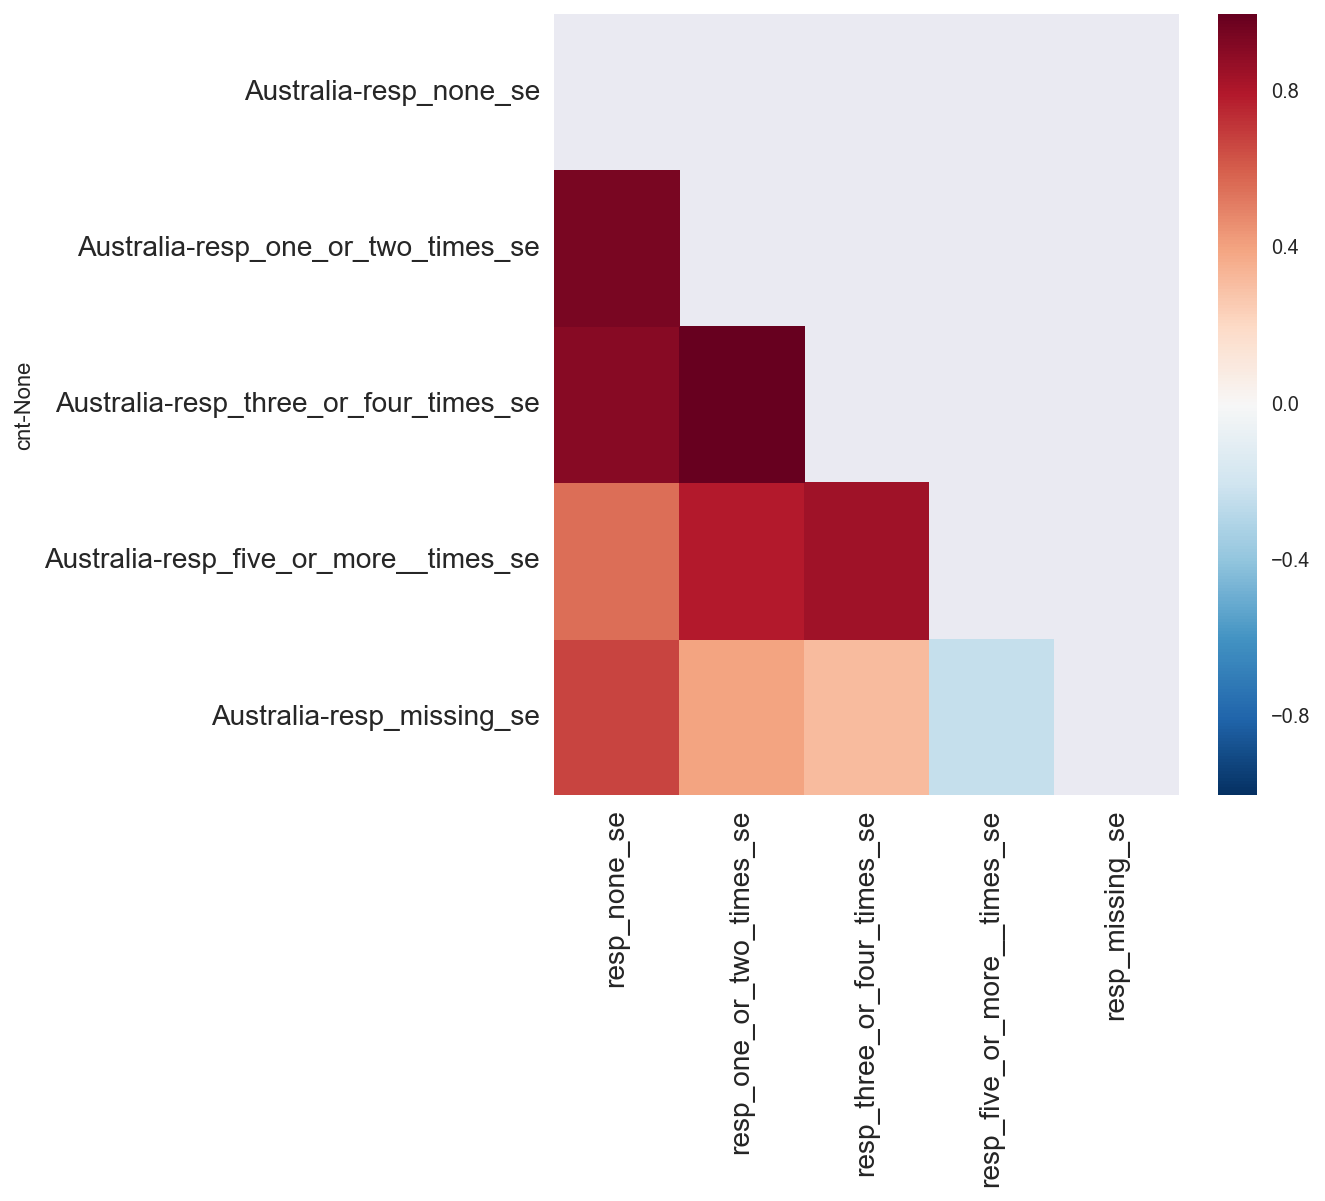

In [85]:
corrs = stu_late_skip.corr()[0:5]

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

# Loading in Q29 from students questionaire.

In [40]:
# ST55Q01 - "Out of school lessons - <test lang>"

ST55Q01 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q01.xls', 
                        skiprows = 1)

# ST55Q02 - "Out of school lessons - <maths>"

ST55Q02 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q02.xls', 
                        skiprows = 1)

# ST55Q03 - "Out of school lessons - <science>"

ST55Q03 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q03.xls',
                        skiprows = 1)

# ST55Q04,"Out of school lessons - other"

ST55Q04 = pd.read_excel('/Users/nichollejames/Desktop/capstone_project/assets/compressed_compendium_files/C_comp_STU_MAR31/ST55Q04.xls',
                        skiprows = 1)



## Cleaning headers and column values

In [43]:
for w in ST55Q01.columns:
    ST55Q01 = ST55Q01.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for w in ST55Q01:
        ST55Q01 = ST55Q01[ST55Q01.no_of_valid_resp != 'Valid']     
        
# ST55Q01 remove () from column values

ST55Q01[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q01[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(lambda value: value.replace('(', '').replace(')',''))

ST55Q01[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q01[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(float)

In [86]:
ST55Q01.isnull().sum()

cnt                                                                    0
total_number_of_resp                                                   2
pct_not_valid                                                          2
no_of_valid_resp                                                       2
resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct    0
resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se     0
resp_less_than_2_hours_a_week_pct                                      0
resp_less_than_2_hours_a_week_se                                       0
resp_2_or_more_but_less_than_4_hours_a_week_pct                        0
resp_2_or_more_but_less_than_4_hours_a_week_se                         0
resp_4_or_more_but_less_than_6_hours_a_week_pct                        0
resp_4_or_more_but_less_than_6_hours_a_week_se                         0
resp_6_or_more_hours_a_week_pct                                        0
resp_6_or_more_hours_a_week_se                     

In [46]:
for x in ST55Q02.columns:
    ST55Q02 = ST55Q02.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for x in ST55Q02:
        ST55Q02 = ST55Q02[ST55Q02.no_of_valid_resp != 'Valid']     
        
# ST55Q02 remove () from column values

ST55Q02[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q02[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(lambda value: value.replace('(', '').replace(')',''))

ST55Q02[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q02[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(float)

In [47]:
ST55Q02.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se,resp_less_than_2_hours_a_week_pct,resp_less_than_2_hours_a_week_se,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_se,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_se,resp_6_or_more_hours_a_week_pct,resp_6_or_more_hours_a_week_se,pct__resp_missing,resp_missing_se
1,Australia,250711,33.8807,165768,71.5562,0.62,15.1866,0.46,7.38768,0.35,3.00805,0.21,1.06131,0.11,1.80024,0.13
2,Austria,82225,35.2921,53206.1,75.122,1.00,14.116,0.76,6.21911,0.56,1.57452,0.23,0.647814,0.16,2.32056,0.27
3,Belgium,117889,35.4366,76112.9,63.9909,0.77,15.3721,0.47,11.7959,0.50,5.27329,0.34,1.30958,0.17,2.25819,0.25
4,Canada,347987,34.328,228530,71.344,0.67,13.8131,0.42,7.73706,0.40,3.24604,0.24,1.95283,0.20,1.90693,0.18
5,Chile,229159,34.1599,150878,61.2728,1.07,14.4196,0.74,8.09995,0.52,7.00269,0.53,7.43808,0.53,1.76687,0.23


In [49]:
for y in ST55Q03.columns:
    ST55Q03 = ST55Q03.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for y in ST55Q03:
        ST55Q03 = ST55Q03[ST55Q03.no_of_valid_resp != 'Valid']     
        
# ST55Q03 remove () from column values

ST55Q03[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q02[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(lambda value: value.replace('(', '').replace(')',''))

ST55Q03[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q03[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(float)

In [50]:
ST55Q03.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se,resp_less_than_2_hours_a_week_pct,resp_less_than_2_hours_a_week_se,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_se,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_se,resp_6_or_more_hours_a_week_pct,resp_6_or_more_hours_a_week_se,pct__resp_missing,resp_missing_se
1,Australia,250711,33.8807,165768,82.5763,0.47,8.0001,0.34,4.34922,0.24,1.86991,0.14,0.885964,0.10,2.31853,0.16
2,Austria,82225,35.2921,53206.1,91.7267,0.65,3.2389,0.39,1.31369,0.24,0.348412,0.11,0.285582,0.11,3.0867,0.34
3,Belgium,117889,35.4366,76112.9,72.7869,0.80,11.8825,0.55,8.5825,0.41,2.65986,0.25,1.02277,0.16,3.06542,0.26
4,Canada,347987,34.328,228530,78.5346,0.58,9.60901,0.35,5.64888,0.30,2.42004,0.20,1.61387,0.18,2.17362,0.19
5,Chile,229159,34.1599,150878,69.9227,0.93,11.2308,0.61,9.50337,0.55,4.23436,0.38,2.99416,0.30,2.11466,0.27


In [51]:
for x in ST55Q04.columns:
    ST55Q04 = ST55Q04.rename(columns={'Unnamed: 0': 'cnt',
                                        'N': 'total_number_of_resp',
                                        'N/A': 'pct_not_valid',
                                        'N.1': 'no_of_valid_resp',
                                        'I do not attend <out-of-school time lessons> in this subject': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct',
                                        'I do not attend <out-of-school time lessons> in this subject.1': 'resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                        'Less than 2 hours a week': 'resp_less_than_2_hours_a_week_pct',
                                        'Less than 2 hours a week.1': 'resp_less_than_2_hours_a_week_se',
                                        '2 or more but less than 4 hours a week': 'resp_2_or_more_but_less_than_4_hours_a_week_pct',
                                        '2 or more but less than 4 hours a week.1': 'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                        '4 or more but less than 6 hours a week': 'resp_4_or_more_but_less_than_6_hours_a_week_pct',
                                        '4 or more but less than 6 hours a week.1': 'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                        '6 or more hours a week': 'resp_6_or_more_hours_a_week_pct',
                                        '6 or more hours a week.1': 'resp_6_or_more_hours_a_week_se',
                                        'Missing': 'pct__resp_missing',
                                        'Missing.1': 'resp_missing_se',
                     })

# Delete the first row since it was inserted into the column headers
for x in ST55Q04:
        ST55Q04 = ST55Q04[ST55Q04.no_of_valid_resp != 'Valid']     
        
# ST55Q04 remove () from column values

ST55Q04[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q04[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(lambda value: value.replace('(', '').replace(')',''))

ST55Q04[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
          'resp_less_than_2_hours_a_week_se',
          'resp_2_or_more_but_less_than_4_hours_a_week_se',
          'resp_4_or_more_but_less_than_6_hours_a_week_se',
          'resp_6_or_more_hours_a_week_se',
          'resp_missing_se']] = ST55Q04[['resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se',
                                          'resp_less_than_2_hours_a_week_se',
                                          'resp_2_or_more_but_less_than_4_hours_a_week_se',
                                          'resp_4_or_more_but_less_than_6_hours_a_week_se',
                                          'resp_6_or_more_hours_a_week_se',
                                          'resp_missing_se']].applymap(float)

In [52]:
ST55Q04.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se,resp_less_than_2_hours_a_week_pct,resp_less_than_2_hours_a_week_se,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_se,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_se,resp_6_or_more_hours_a_week_pct,resp_6_or_more_hours_a_week_se,pct__resp_missing,resp_missing_se
1,Australia,250711,33.8807,165768,72.1065,0.55,11.2079,0.38,7.36575,0.34,3.56755,0.22,2.75493,0.16,2.9974,0.18
2,Austria,82225,35.2921,53206.1,79.9187,0.85,11.5485,0.64,4.04319,0.42,1.04528,0.19,0.64506,0.13,2.79926,0.34
3,Belgium,117889,35.4366,76112.9,66.482,0.68,13.4056,0.51,10.1424,0.46,3.35148,0.28,3.19857,0.25,3.41995,0.27
4,Canada,347987,34.328,228530,70.5625,0.56,12.1762,0.43,7.09234,0.30,4.0261,0.28,3.78165,0.26,2.36125,0.21
5,Chile,229159,34.1599,150878,66.5116,0.98,13.814,0.61,8.62899,0.53,4.23484,0.33,3.59233,0.36,3.21817,0.31


In [53]:
Q29 = ST55Q01.append(ST55Q02).append(ST55Q03).append(ST55Q04)

In [55]:
Q29.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se,resp_less_than_2_hours_a_week_pct,resp_less_than_2_hours_a_week_se,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_se,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_se,resp_6_or_more_hours_a_week_pct,resp_6_or_more_hours_a_week_se,pct__resp_missing,resp_missing_se
1,Australia,250711,33.8807,165768,78.6603,0.49,11.1581,0.37,5.07369,0.25,2.27291,0.19,0.949135,0.1,1.88586,0.15
2,Austria,82225,35.2921,53206.1,89.5097,0.71,5.26425,0.55,2.12589,0.28,0.50702,0.12,0.299853,0.09,2.29328,0.28
3,Belgium,117889,35.4366,76112.9,74.045,0.66,12.2027,0.42,6.56542,0.33,4.12907,0.29,0.643246,0.12,2.41458,0.24
4,Canada,347987,34.328,228530,78.5976,0.53,9.90705,0.39,4.99959,0.26,2.45517,0.21,1.82086,0.16,2.21971,0.21
5,Chile,229159,34.1599,150878,70.7116,1.04,9.12082,0.6,4.89571,0.44,6.32237,0.42,6.81562,0.54,2.13389,0.27


In [56]:
Q29_groupby = Q29.groupby('cnt')

In [59]:
Q29_groupby.head()

,cnt,total_number_of_resp,pct_not_valid,no_of_valid_resp,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_pct,resp_i_do_not_attend_out_of_school_time_lessons_in_this_subject_se,resp_less_than_2_hours_a_week_pct,resp_less_than_2_hours_a_week_se,resp_2_or_more_but_less_than_4_hours_a_week_pct,resp_2_or_more_but_less_than_4_hours_a_week_se,resp_4_or_more_but_less_than_6_hours_a_week_pct,resp_4_or_more_but_less_than_6_hours_a_week_se,resp_6_or_more_hours_a_week_pct,resp_6_or_more_hours_a_week_se,pct__resp_missing,resp_missing_se
1,Australia,250711,33.8807,165768,78.6603,0.49,11.1581,0.37,5.07369,0.25,2.27291,0.19,0.949135,0.1,1.88586,0.15
2,Austria,82225,35.2921,53206.1,89.5097,0.71,5.26425,0.55,2.12589,0.28,0.50702,0.12,0.299853,0.09,2.29328,0.28
3,Belgium,117889,35.4366,76112.9,74.045,0.66,12.2027,0.42,6.56542,0.33,4.12907,0.29,0.643246,0.12,2.41458,0.24
4,Canada,347987,34.328,228530,78.5976,0.53,9.90705,0.39,4.99959,0.26,2.45517,0.21,1.82086,0.16,2.21971,0.21
5,Chile,229159,34.1599,150878,70.7116,1.04,9.12082,0.6,4.89571,0.44,6.32237,0.42,6.81562,0.54,2.13389,0.27
6,Czech Republic,82250.1,35.5941,52973.9,68.2729,1.01,18.0786,0.64,8.72477,0.68,2.79628,0.37,1.04066,0.23,1.08683,0.2
7,Denmark,65642,35.2994,42470.8,59.3238,0.86,13.0443,0.66,14.5428,0.68,7.44107,0.47,3.38886,0.31,2.25913,0.25
8,Estonia,11626.5,33.871,7688.5,73.882,0.92,12.1058,0.68,7.91369,0.52,3.72307,0.46,1.07057,0.25,1.30492,0.22
9,Finland,60047.2,34.3122,39443.7,52.2419,0.87,23.166,0.7,17.5748,0.74,4.65202,0.41,0.700985,0.18,1.66432,0.21
10,France,699779,34.8476,455922,69.9589,0.9,13.2903,0.65,8.11339,0.47,4.76214,0.35,0.863369,0.2,3.01195,0.43


In [60]:
Q29_groupby.corr()

,
cnt,
